In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
def hypothesis(x,theta):
    h1 = np.dot(x,theta)
    return 1.0/(1.0+np.exp(-h1))

In [87]:
def error(X,Y,theta):
    
    m,n = X.shape
    err = 0
    for i in range(m):
        hx = hypothesis(X[i],theta)
        err = err + Y[i]*np.log(hx) + (1-Y[i])*np.log(1-hx)
    return -err/m    

In [88]:
def gradient(X,Y,theta):
    
    m,n = X.shape
    grad = np.zeros((n,))
    for i in range(m):
        hx = hypothesis(X[i],theta)
        for j in range(n):
            grad[j]+=(hx-Y[i])*X[i][j]
            
    return grad/m        

In [134]:
def gradient_descent(X,Y,lr=0.5,max_itr=1000):
    
    m,n = X.shape
    err_list = []
    theta = np.zeros((n,))
    
    for i in range(max_itr):
        
        err = error(X,Y,theta)
        err_list.append(err)
        grad = gradient(X,Y,theta)
        
        for j in range(n):
            theta[j] = theta[j] - lr*grad[j]
    return theta,err_list        

In [135]:
X = pd.read_csv('Logistic_X_Train.csv').values
Y = pd.read_csv('Logistic_Y_Train.csv').values

In [136]:
print(X.shape,Y.shape)

(3000, 3) (3000, 1)


In [137]:
one = np.ones((X.shape[0],1))

In [138]:
X = np.hstack((one,X))

In [139]:
print(X.shape,Y.shape)

(3000, 4) (3000, 1)


In [140]:
theta,err_list = gradient_descent(X,Y)

In [141]:
print(theta)

[-3.50441307 -3.42201745  2.65407176 -2.40819461]


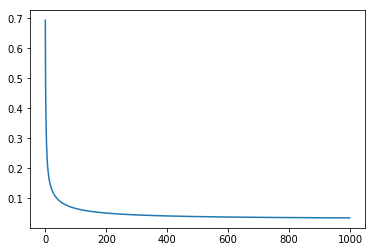

In [142]:
plt.plot(err_list)
plt.show()

In [153]:
x_test = pd.read_csv('Logistic_X_Test.csv').values

In [154]:
print(x_test.shape)

(1000, 3)


In [155]:
ones = np.ones((x_test.shape[0],1))
x_test = np.hstack((ones,x_test))

In [156]:
y_test = []
m = x_test.shape[0]
for i in range(m):
    hx = hypothesis(x_test[i],theta)
    y_test.append(hx)

In [157]:
y_test = np.array(y_test)

In [158]:
print(y_test.shape)

(1000,)


In [160]:
for i in  range(y_test.shape[0]):
    if y_test[i]>=0.5:
        y_test[i]=1
    else:
        y_test[i]=0

In [162]:
y_test = np.array(y_test,dtype='int64')

In [ ]:
df = pd.DataFrame(data=y_test,)